## Notes on the observation and code

-A Schmidt-Cassegrain Telescope with 200 mm diameter, focal ratio f/10, equipped with a focal reducer f/6.3, with the capability of automatic aligment and pointing + CCD ATIK 460EX with a single filter

-Pollux (Gal. Coord):l=192.22928777 b=23.40626890, m=1.4 in V filter (Simbad)

-This code was developed on Jupyter Notebook Local host server launched with **Anaconda Manager on Windows 10 on Julia's PC**

**NOTA BENE** 

Se volete modificare la classe, fatte un altro file Calibration.py

## Importing libraries, creating the fundamental folders and reading the header of an image

In [1]:
import os
import numpy as np
from astropy.io import fits

main_dir =os.getcwd()
light_dir= os.path.join(main_dir+"\\"+"data\\2024_PhotometryDataset01\\Lights_Pollux")

#in this way we find out the exposure time
f = fits.open(os.path.join(light_dir+"\\"+"PolluxLight_1_1_1_of_5.fit"))
f[0].header
#no wcs!!

 [astropy.io.fits.verify]


SIMPLE  =                    T                                                  
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 2749                                                  
NAXIS2  =                 2199                                                  
BSCALE  =                    1                                                  
BZERO   =                32768                                                  
XPIXSZ  = '4,53999996185303'                                                    
YPIXSZ  = '4,53999996185303'                                                    
XBINNING=                    1                                                  
YBINNING=                    1                                                  
EXPTIME = '0,05    '                                                            
ISCOLOUR=                   

## Image reduction

In [2]:
from Calibration_j import OptCCDObs

main_dir =os.getcwd()
bias_dir = os.path.join(main_dir+"\\"+"data\\2024_PhotometryDataset01\\Bias") #we are working on Windows
dark_dir = os.path.join(main_dir+"\\"+"data\\2024_PhotometryDataset01\\Darks_Pollux")
flat_dir = os.path.join(main_dir+"\\"+"data\\2024_PhotometryDataset01\\Flats")
light_dir= os.path.join(main_dir+"\\"+"data\\2024_PhotometryDataset01\\Lights_Pollux")

atik=OptCCDObs("CCD Atik460", 2749*2199,"Pollux", bias_dir, dark_dir,flat_dir, light_dir)

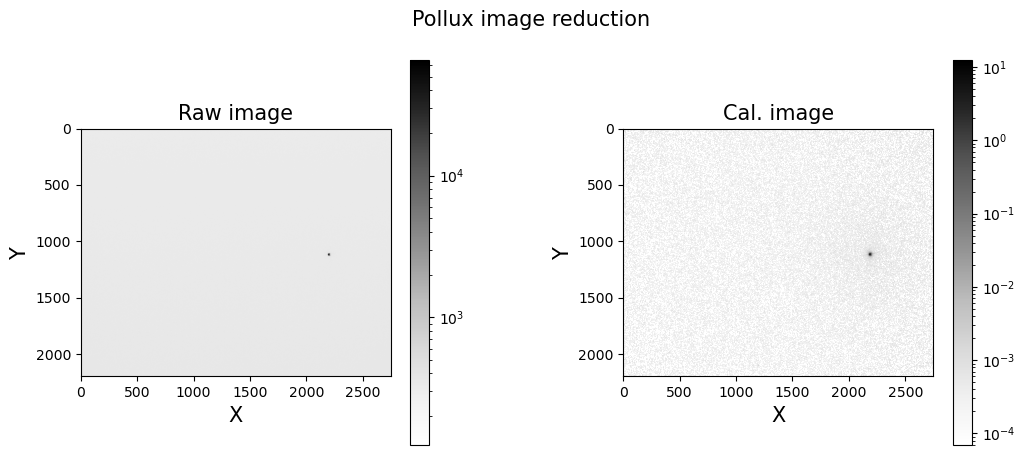

In [3]:
#Calibrating with master bias, master dark and master flat frames. 
#Eliminating the background noise
atik.plot_calibrated_image()

## Photometry on Pollux

We give a first guess for the centroid position and radius of circular aperture and perform a initial aperture photometry 
with the centroid and FWHM obtaine. We then perform aperture photometry on a circular aperture and an annulus and evaluate the sky background on the photon counts in the circular aperture

Global background on overall image 0.0001535272894757043 $\pm$ Noise 0.0018946432454411935
Centroid 2190.537682376216 1118.8036977652491
FWHM 7.333918413906965
 id      xcenter           ycenter         aperture_sum_0    aperture_sum_1 
           pix               pix                                            
--- ----------------- ------------------ ----------------- -----------------
  1 2190.537682376216 1118.8036977652491 582.2822253318318 3.379610505704424
Sky background 1.2673539396391595
Costant calibration 8.050468121341195
Signal to Noise ratio 12.524962750378819
M_V [-6.91046812] 
dmv [0.08668578]


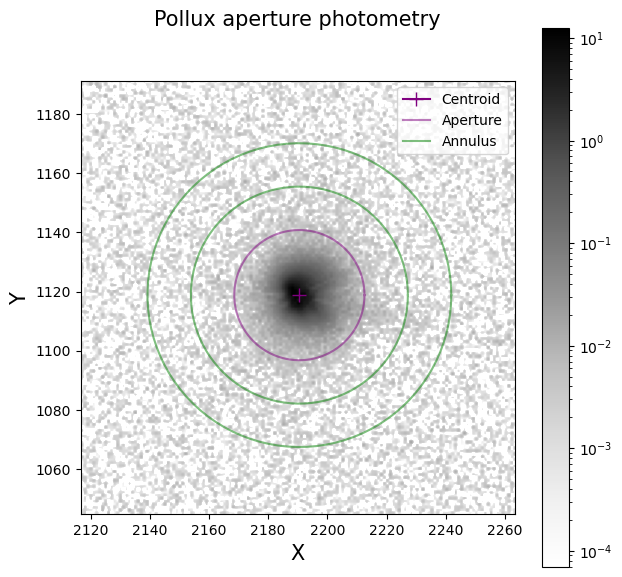

In [4]:
atik.aperture_photometry(xcen=2250,ycen=1000,radius=500)

#from the characterization of the CCD camera
gain=0.27 #e-/ADU
readout_noise=5.7 #e-
dark_current=0.11e-6 #e-/s/pix
exp_time=0.05 #s
dark_noise=np.sqrt(dark_current *exp_time)

mv=atik.magnitude(gain,dark_noise,readout_noise,1.14)

Global background on overall image 0.0001535272894757043 $\pm$ Noise 0.0018946432454411935
Centroid 2190.537682376216 1118.8036977652491
FWHM 7.333918413906965


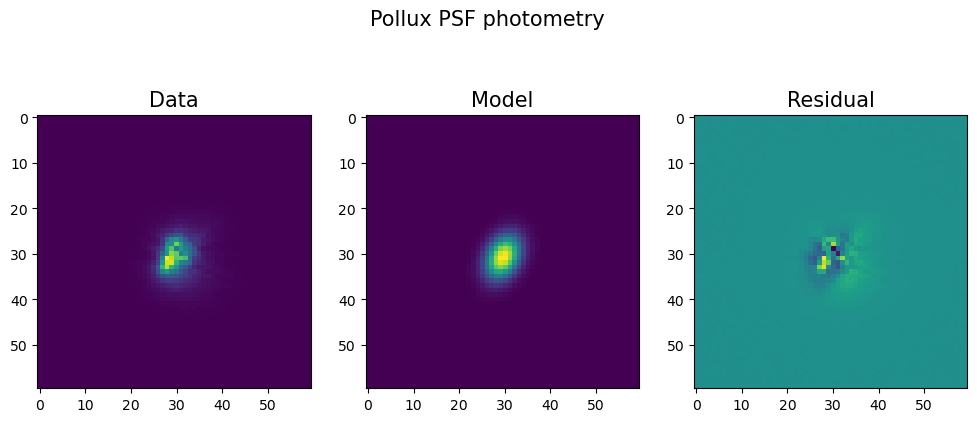

In [5]:
##PSF PHOTOMETRY
atik.PSF_photometry(xcen=2250,ycen=1000,radius=500,model='gaussian')

## Multiple aperture photometry on a cluster


We now pass to perform aperture photometry on a stellar cluster, M44/NGC 2632 -- Praesepe Open Cluster, Beehive Cluster-> Cancer constellation

a well populated (1000 stars circa), nearby open cluster of intermediate age

(Gal. Coord):l=205.9525 b=32.4278 (Simbad),600 ly, 3.7 Mv (integrated)


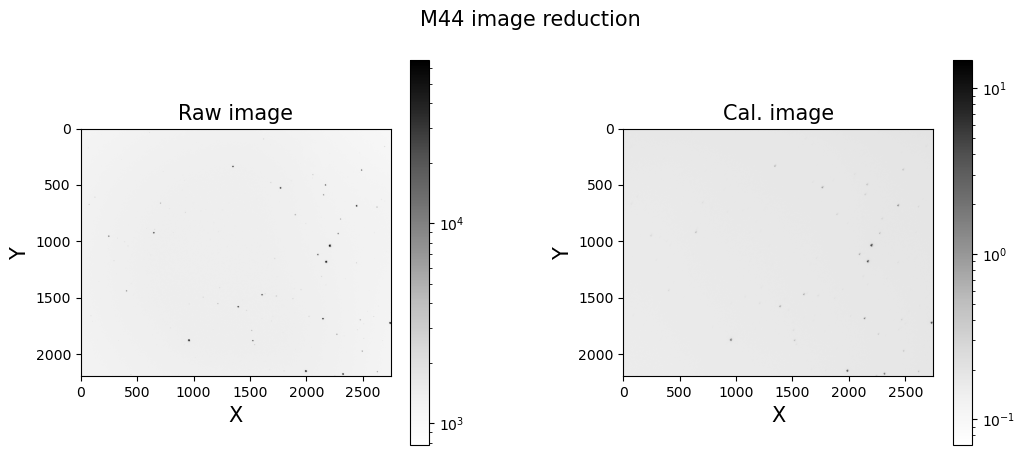

In [6]:
dark_dir = os.path.join(main_dir+"\\"+"data\\2024_PhotometryDataset01\\Darks_M44")
light_dir= os.path.join(main_dir+"\\"+"data\\2024_PhotometryDataset01\\Lights_M44")

atik=OptCCDObs("CCD Atik460",2749*2199, "M44", bias_dir, dark_dir,flat_dir, light_dir)
atik.plot_calibrated_image()

Background noise 0.008322604062121075
Centroid 2007.4692529221857 1308.0559505453161
FWHM 1.6728674109184154
Number of sources found in the image: 100


C:\Users\John\Desktop\JULIA MMLAB\Calibration_j.py:347: RuntimeWarning: invalid value encountered in log10
  mv=-2.5*np.log10(self.source_counts-self.local_sky_bkg)


Signal to Noise ratio [ 1.46766898  1.42138755  1.43429784  1.37887077  1.38923243  1.43414676
  1.64530954  1.44137729  1.39217024  1.41849182  1.42239882  2.24197234
  3.22067934  1.41105377  1.41209517  1.50928328  1.65450334  1.4590569
  1.46887224  1.56671811  1.99285292  2.78715574  3.89641803  1.74016005
  2.22807441  1.51998163  1.51236015  1.70431157  1.49529754  3.07207773
  4.8557861   1.62920208  1.95634484  1.48641168  1.69335028  2.12408017
  2.09410271  1.46565014  2.72465502  2.89480596  2.04699561  1.53794816
  2.81177996  1.48361614  1.58624038  1.8769106   2.03080781  1.39880051
  7.01830151 10.2341723   3.51080288  1.58139259  9.03261354  1.53045294
  1.70034057  1.61051513  1.49794244  1.43774241  1.50179925  1.46468878
  1.39580329  1.58390856  1.51161516  1.45034759  1.86574009  1.49357526
  2.36792461  3.40825633  1.7459075   1.49267373  1.44677721  1.5758117
  1.47927203  1.6854997   1.43252584  2.40497109  1.51804562  3.65852519
  1.49207644  1.39888717  1.470

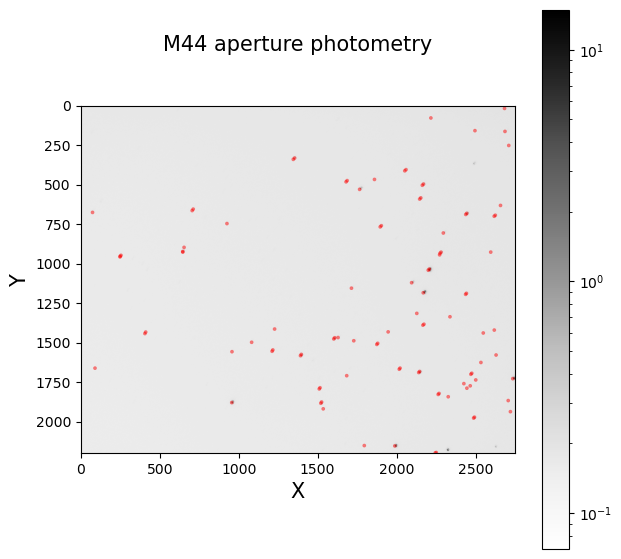

In [7]:
exp_time=20
dark_noise=np.sqrt(dark_current *exp_time)

atik.multapert_photometry(2000,1200,30)
mv=atik.magnitude(gain,dark_noise,readout_noise,magn_exp=0,C=8)

In [11]:
np.mean(mv) #check for average values of magnitude 

6.427291528066004